In [2]:
import pickle
import numpy as np
from modified_minisom import MiniSom as Som
# from nltk.corpus import stopwords

# Converting Doc to Vec

In [2]:
# stop_words = set(stopwords.words("english"))

In [5]:
# def read_vec():
#     with open("crawl-300d-2M-subword.vec") as fp:
#         for line in fp.readlines():
#             splitted = line.split(" ")
#             yield splitted[0], np.array(splitted[1:], dtype=np.float)
# fastext_dict = {w:x for w,x in read_vec()}
# pickle.dump(fastext_dict,open("fasttext_vec.pkl","wb"))
# pickle.dump(stop_words,open("stopwrd","wb"))

In [49]:
fasttext_dict = pickle.load(open("fasttext_vec.pkl","rb"))

In [47]:
comments = pickle.load(open("processed_comments.pkl","rb"))

In [4]:
stop_words = pickle.load(open("stopwrd","rb"))

In [5]:
def tokenize_comments(comments):
    comments = comments.split()
    comments = [t for t in comments 
                if t not in stop_words and t != '']
    return comments

tokenized_comments = [tokenize_comments(comment)
                         for comment in comments]

In [35]:
def comments_to_vec(tokens):
    words = [word for word in np.unique(tokens) 
            if word in fasttext_dict]
    if len(words) > 0:
        return np.array([fasttext_dict[word] for word in words ])
    else :
        return words = '.'
    
vectorized_comments = [comments_to_vec(comments).mean(axis=0)
                       for comments in tokenized_comments]
vectorized_comments = np.array(vectorized_comments) 

# SOM training

In [2]:
from minisom import MiniSom as som

In [3]:
comments_vec = pickle.load(open("comments_vec.pkl","rb"))

In [4]:
comment_list = []
for i in range(comments_vec.shape[0]):
    try:
        comments_vec[i].shape[0]
        comment_list.append(comments_vec[i])
    except:
        print(i)
comments = np.array(comment_list)

1422
7075
7115
18111
23588
23647
37755
37850
39313
40365
40715
40956
45334
47685
49221
49264
49316
49410
49473
49479
50030
50515
52314
52337
56381
57796
57853
57919
58050
58144
58151
61661
62071
65023
67558
67561
69286
75860
80630
98312
99072
99688
100649
102800
102850
110170
111337
111635
112847
112968
113350
113353
113721
113921
116195
116198
116398
119883
119886
120157
120197
123990
124288
128215
128246
128764
129136
129186
136826
137236
138970
139734
139737
141608
141611
144147
148974
149041
149074
149205
151384
151869
153332
154066
156967
157388
157392
157529
163115
163208
163348
167109


In [14]:
map_dim = 20
model = som(map_dim, map_dim, 300, sigma=1.0, random_seed=1)
model.train_batch(comments,len(comments)*60)

In [16]:
from hyperopt import fmin, tpe, hp

In [17]:
def mod_train_som(data,x,y,input_len,sigma,alpha):
    som = MiniSom(x=map_dim,y=map_dim,input_len=300,sigma=sigma,learning_rate=alpha)
    som.random_weights_init(data)
    #training
    som.train_random(data,iteration)
    return som

In [18]:
# set hyper parameter
row = comment1.shape[0]
x = int(np.sqrt(5 * np.sqrt(row)))
y = x
input_len = comment1.shape[1]
sigma = 0.003
alpha = 5
iteration = 100

In [22]:
best = fmin(
    fn=lambda sig: MiniSom(x=x,y=x,input_len=300,sigma=sigma,
                           learning_rate=alpha).quantization_error(comment1),
    space=hp.uniform("sig", 0.001, x/2.01),
    algo=tpe.suggest,
    max_evals=200)

In [23]:
sigma = best['sig']

In [70]:
model.train_som(x,y,input_len,sigma,alpha)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
dict_ = {}
for i,vec in enumerate(W):
    winnin_position = model.winner(vec)
    plt.text(winnin_position[0],winnin_position[1]+np.random.rand()*.9)

(9, 3)

In [ ]:
map_dim = 20
plt.figure(figsize=(20, 20))
for i, vec in enumerate(comments1):
    winnin_position = model1.winner(vec)
    plt.text(winnin_position[0], 
             winnin_position[1]+np.random.rand()*.9,
             i)

plt.xticks(range(map_dim))
plt.yticks(range(map_dim))
plt.grid()
plt.xlim([0, map_dim])
plt.ylim([0, map_dim])
plt.plot()

# Other Clustering Algos:

# Kmean

In [38]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [39]:
Nc = range(20, 40)
kmeans = [KMeans(n_clusters=i) for i in Nc]

In [17]:
score = [kmeans[i].fit(comments1).score(comments1) for i in range(len(kmeans))]
# score1 = [kmeans[i].fit(comments1).score(comments1) for i in range(len(kmeans))]
# kmean.fit(comments1).score(comments1)

# T-SNE

In [10]:
import random

In [15]:
from sklearn.manifold import TSNE
# import matplotlib.pyplot as plt


# Defining Model
tsne_5 = TSNE(perplexity=5, n_iter=500)
tsne_10 = TSNE(perplexity=10, n_iter=500)
tsne_30 = TSNE(perplexity=30, n_iter=500)

# # Fitting Model
print("5")
T_tsne_5 = tsne_5.fit_transform(random.sample(list(comments1),10000))
print("10")
T_tsne_10 = tsne_10.fit_transform(random.sample(list(comments1),10000))
print("30")
T_tsne_30 = tsne_30.fit_transform(random.sample(list(comments1),10000))

5
10
30


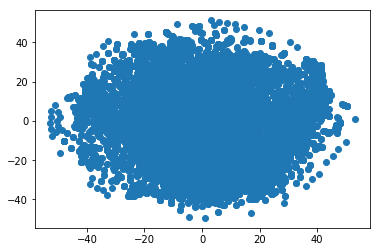

In [16]:
# # Plotting 2d t-Sne
x_axis = T_tsne_5[:, 0]
y_axis = T_tsne_5[:, 1]

plt.scatter(x_axis, y_axis)
plt.show()

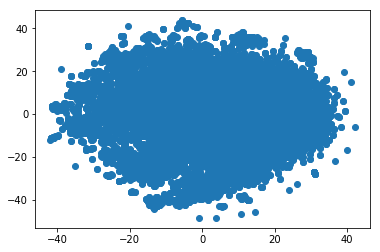

In [17]:
x_axis = T_tsne_10[:, 0]
y_axis = T_tsne_10[:, 1]

plt.scatter(x_axis, y_axis)
plt.show()

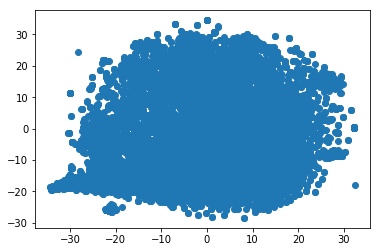

In [18]:
x_axis = T_tsne_30[:, 0]
y_axis = T_tsne_30[:, 1]

plt.scatter(x_axis, y_axis)
plt.show()

# PCA

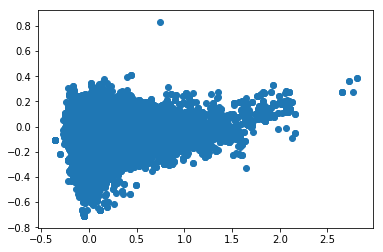

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(comments1)
pca_2d = pca.transform(comments1)
plt.scatter(pca_2d[:,0],pca_2d[:,1])
plt.show()

# DBSCAN

In [20]:
from sklearn.cluster import DBSCAN

# Declaring Model
dbscan = DBSCAN()

# Fitting
dbscan.fit(comments1)

# Hierarchy Clustering

In [37]:
# Importing Modules
from scipy.cluster.hierarchy import linkage, dendrogram

mergings = linkage(comments1, method='complete')

dendrogram(mergings,leaf_rotation=90,leaf_font_size=6)

# EM Cluster

In [36]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        #Assign labels - closest center
        labels = pairwise_distances_argmin(X, centers)
        
        #Find new centers from means
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        #Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(comments1, 4)

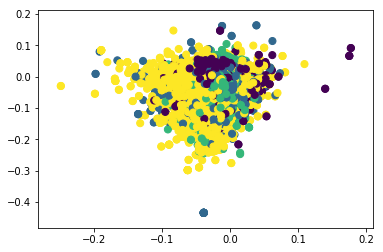

In [35]:
plt.scatter(comments1[:, 0], comments1[:, 1], c=labels, s=50, cmap='viridis')

# Finding vul docs

In [14]:
import re
import pickle

word = ['security','CVE','NVD','securities','vulnerability','Cross-Site Scripting','XSS']

comments = pickle.load(open("processed_comments.pkl","rb"))

vul_list = []
for i,comment in enumerate(comments):
    if w in word:
        vul_list.append(i)

In [25]:
demo = pickle.load(open("demo.pkl","rb"))